In [3]:
import zipfile

with zipfile.ZipFile("KDD_dataset.zip", "r") as zip_ref:
    zip_ref.extractall(".")

print("Extracted dataset!")


Extracted dataset!


In [4]:
import pandas as pd

file_path = "KDD+.txt"

columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 
    'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'attack', 'level'
]

df = pd.read_csv(file_path, names=columns)
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
df = pd.read_csv(file_path, names=columns)

In [6]:
print(df.head())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2             

In [7]:
df['attack_flag'] = df['attack'].apply(lambda a: 0 if a == 'normal' else 1)

In [6]:
print(df.head())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2             

In [8]:
# Multi-class classification target categories
dos_attacks = ['apache2', 'back', 'land', 'neptune', 'mailbomb', 'pod', 
               'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm']
probe_attacks = ['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan']
privilege_attacks = ['buffer_overflow', 'loadmdoule', 'perl', 'ps', 
                     'rootkit', 'sqlattack', 'xterm']
access_attacks = ['ftp_write', 'guess_passwd', 'http_tunnel', 'imap', 
                  'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack', 
                  'snmpguess', 'spy', 'warezclient', 'warezmaster', 
                  'xclock', 'xsnoop']

def map_attack(attack):
    if attack in dos_attacks:
        return 1
    elif attack in probe_attacks:
        return 2
    elif attack in privilege_attacks:
        return 3
    elif attack in access_attacks:
        return 4
    else:
        return 0

# Assign multi-class category to each row
df['attack_map'] = df['attack'].apply(map_attack)

In [ ]:
Preprocessing and Splitting the Dataset
Preprocessing the Dataset
This section prepares the NSL-KDD dataset to train a random forest anomaly detection model. The primary goal is to transform the raw network traffic data into a usable format by creating classification targets, encoding categorical variables, and selecting important numeric features. We will produce both binary and multi-class targets, ensure that categorical data is machine-readable, and retain numeric metrics critical to the detection of abnormal traffic patterns.

Creating a Binary Classification Target
The binary classification target identifies whether network traffic is normal or anomalous. We create a new column attack_flag in the DataFrame df to achieve this. Each row receives a label of 0 if the traffic is normal and 1 if it is an attack. This transformation simplifies the initial detection problem into a basic normal-versus-attack classification, which can be a starting point for a more granular analysis.

        python
# Binary classification target
# Maps normal traffic to 0 and any type of attack to 1
df['attack_flag'] = df['attack'].apply(lambda a: 0 if a == 'normal' else 1)

The value normal comes from the dataset; if we look at the dataset, you can see that all traffic is labeled normal or not:

        python
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20
0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.1,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,19

Creating the Multi-Class Classification Target
While a binary target is useful, it lacks granularity. To address this, we also create a multi-class classification target that distinguishes between different categories of attacks. We define lists categorizing specific attacks into four major groups:

DoS (Denial of Service) attacks such as neptune and smurf
Probe attacks that scan networks for vulnerabilities, like satan or ipsweep
Privilege Escalation attacks that attempt to gain unauthorized admin-level control, such as buffer_overflow
Access attacks that seek to breach system access controls, like guess_passwd
A custom function map_attack checks the type of attack and assigns it an integer:

0 for normal traffic
1 for DoS attacks
2 for Probe attacks
3 for Privilege Escalation attacks
4 for Access attacks
This expanded classification target allows models to learn to distinguish between normal and abnormal traffic and the nature of the observed attacks.

        python
# Multi-class classification target categories
dos_attacks = ['apache2', 'back', 'land', 'neptune', 'mailbomb', 'pod', 
               'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm']
probe_attacks = ['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan']
privilege_attacks = ['buffer_overflow', 'loadmdoule', 'perl', 'ps', 
                     'rootkit', 'sqlattack', 'xterm']
access_attacks = ['ftp_write', 'guess_passwd', 'http_tunnel', 'imap', 
                  'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack', 
                  'snmpguess', 'spy', 'warezclient', 'warezmaster', 
                  'xclock', 'xsnoop']

def map_attack(attack):
    if attack in dos_attacks:
        return 1
    elif attack in probe_attacks:
        return 2
    elif attack in privilege_attacks:
        return 3
    elif attack in access_attacks:
        return 4
    else:
        return 0

# Assign multi-class category to each row
df['attack_map'] = df['attack'].apply(map_attack)

Encoding Categorical Variables
Network traffic data often includes categorical attributes that are not directly usable by machine learning algorithms, which generally require numeric inputs. Two important features in the NSL-KDD dataset are protocol_type (e.g., tcp, udp) and service (e.g., http, ftp). These features categorize the nature of network interactions but must be transformed into numeric form.

We use one-hot encoding, provided by the get_dummies function in pandas. This approach creates a binary indicator variable for each category, ensuring that no ordinal relationship is implied between different protocols or services. After encoding, each categorical value is represented by a separate column indicating its presence (1) or absence (0).

        python
# Encoding categorical variables
features_to_encode = ['protocol_type', 'service']
encoded = pd.get_dummies(df[features_to_encode])

Selecting Numeric Features
Beyond categorical variables, the dataset contains a range of numeric features that describe various aspects of network traffic. These include basic metrics like duration, src_bytes, and dst_bytes, as well as more specialized features such as serror_rate and dst_host_srv_diff_host_rate, which capture statistical properties of the network sessions. By selecting these numeric features, we ensure the model has access to both raw volume data and more nuanced, derived statistics that help distinguish normal from abnormal patterns.

        python
# Numeric features that capture various statistical properties of the traffic
numeric_features = [
    'duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 
    'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 
    'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 
    'dst_host_srv_rerror_rate'
]

Preparing the Dataset
The final step is to combine the one-hot encoded categorical features with the selected numeric features. We join them into a single DataFrame train_set that will serve as the primary input to our machine-learning model. We also store the multi-class target variable attack_map as multi_y for classification tasks. At this stage, the data is in a suitable format for splitting into training, validation, test sets, and subsequently training the random forest anomaly detection model.

        python
# Combine encoded categorical variables and numeric features
train_set = encoded.join(df[numeric_features])

# Multi-class target variable
multi_y = df['attack_map']

Splitting the Dataset
In the Data Transformation section, we discussed the rationale and methods for splitting data into training, validation, and test sets. We now apply those principles specifically to the NSL-KDD dataset, ensuring that our random forest anomaly detection model is trained, tuned, and evaluated on distinct subsets.

Splitting Data into Training and Test Sets
We use train_test_split to allocate a portion of the data for testing, ensuring that our final evaluations occur on unseen data.

        python
# Split data into training and test sets for multi-class classification
train_X, test_X, train_y, test_y = train_test_split(train_set, multi_y, test_size=0.2, random_state=1337)

Creating a Validation Set from the Training Data
We further split the training data to create a validation set. This supports model tuning and hyperparameter optimization without contaminating the final test data.

        python
# Further split the training set into separate training and validation sets
multi_train_X, multi_val_X, multi_train_y, multi_val_y = train_test_split(train_X, train_y, test_size=0.3, random_state=1337)

Final Split Variables
After splitting, we have:

train_X, train_y: Core training set
test_X, test_y: Reserved for the final performance evaluation
multi_train_X, multi_train_y: Training subset for fitting the model
multi_val_X, multi_val_y: Validation subset for hyperparameter tuning
This careful partitioning, applied after the transformations and encodings discussed earlier, ensures that the model development process remains consistent and that the final evaluation is unbiased and reflective of real-world performance.

In [9]:
df['attack_flag'] = df['attack'].apply(lambda a: 0 if a == 'normal' else 1)


In [10]:
# Multi-class classification target categories
dos_attacks = ['apache2', 'back', 'land', 'neptune', 'mailbomb', 'pod',
               'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm']

probe_attacks = ['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan']

privilege_attacks = ['buffer_overflow', 'loadmdoule', 'perl', 'ps',
                     'rootkit', 'sqlattack', 'xterm']

access_attacks = ['ftp_write', 'guess_passwd', 'http_tunnel', 'imap',
                  'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack',
                  'snmpguess', 'spy', 'warezclient', 'warezmaster',
                  'xclock', 'xsnoop']

def map_attack(attack):
    if attack in dos_attacks:
        return 1
    elif attack in probe_attacks:
        return 2
    elif attack in privilege_attacks:
        return 3
    elif attack in access_attacks:
        return 4
    else:
        return 0

df['attack_map'] = df['attack'].apply(map_attack)


In [11]:
# Encoding categorical variables
features_to_encode = ['protocol_type', 'service']
encoded = pd.get_dummies(df[features_to_encode])


In [12]:
numeric_features = [
    'duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 
    'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 
    'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 
    'dst_host_srv_rerror_rate'
]


In [13]:
train_set = encoded.join(df[numeric_features])


In [14]:
train_set.shape


(148517, 107)

In [15]:
multi_y = df['attack_map']

In [16]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
    train_set, multi_y, test_size=0.2, random_state=1337
)


In [17]:
multi_train_X, multi_val_X, multi_train_y, multi_val_y = train_test_split(
    train_X, train_y, test_size=0.3, random_state=1337
)


In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=None,
    min_samples_split=2,
    n_jobs=-1,
    random_state=1337
)

rf.fit(multi_train_X, multi_train_y)


RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=1337)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

val_pred = rf.predict(multi_val_X)

print(classification_report(multi_val_y, val_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18519
           1       1.00      1.00      1.00     12784
           2       0.99      0.99      0.99      3409
           3       0.80      0.33      0.47        24
           4       0.98      0.92      0.95       908

    accuracy                           0.99     35644
   macro avg       0.95      0.85      0.88     35644
weighted avg       0.99      0.99      0.99     35644



In [20]:
test_pred = rf.predict(test_X)
print(classification_report(test_y, test_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15402
           1       1.00      1.00      1.00     10721
           2       0.99      1.00      1.00      2796
           3       1.00      0.19      0.32        21
           4       0.96      0.92      0.94       764

    accuracy                           1.00     29704
   macro avg       0.99      0.82      0.85     29704
weighted avg       0.99      1.00      0.99     29704



In [21]:
rf_model_multi = RandomForestClassifier(random_state=1337)
rf_model_multi.fit(multi_train_X, multi_train_y)


RandomForestClassifier(random_state=1337)

In [22]:
multi_predictions = rf_model_multi.predict(multi_val_X)


In [23]:
accuracy_score()
precision_score()
recall_score()
f1_score()

NameError: name 'accuracy_score' is not defined

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [25]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


In [26]:
accuracy = accuracy_score(multi_val_y, multi_predictions)
precision = precision_score(multi_val_y, multi_predictions, average='weighted')
recall = recall_score(multi_val_y, multi_predictions, average='weighted')
f1 = f1_score(multi_val_y, multi_predictions, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9950061721467849
Precision: 0.9949143248140561
Recall: 0.9950061721467849
F1 Score: 0.9948840514181876


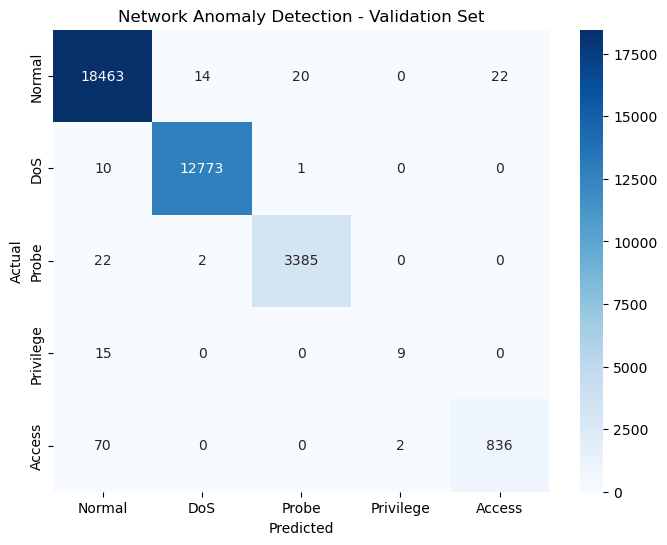

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(multi_val_y, multi_predictions)
class_labels = ['Normal', 'DoS', 'Probe', 'Privilege', 'Access']

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Network Anomaly Detection - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [28]:
print(classification_report(multi_val_y, multi_predictions, target_names=class_labels))


              precision    recall  f1-score   support

      Normal       0.99      1.00      1.00     18519
         DoS       1.00      1.00      1.00     12784
       Probe       0.99      0.99      0.99      3409
   Privilege       0.82      0.38      0.51        24
      Access       0.97      0.92      0.95       908

    accuracy                           1.00     35644
   macro avg       0.96      0.86      0.89     35644
weighted avg       0.99      1.00      0.99     35644



In [29]:
test_multi_predictions = rf_model_multi.predict(test_X)

test_accuracy = accuracy_score(test_y, test_multi_predictions)
test_precision = precision_score(test_y, test_multi_predictions, average='weighted')
test_recall = recall_score(test_y, test_multi_predictions, average='weighted')
test_f1 = f1_score(test_y, test_multi_predictions, average='weighted')

print("Test Set Evaluation:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")


Test Set Evaluation:
Accuracy: 0.9949
Precision: 0.9947
Recall: 0.9949
F1-Score: 0.9947


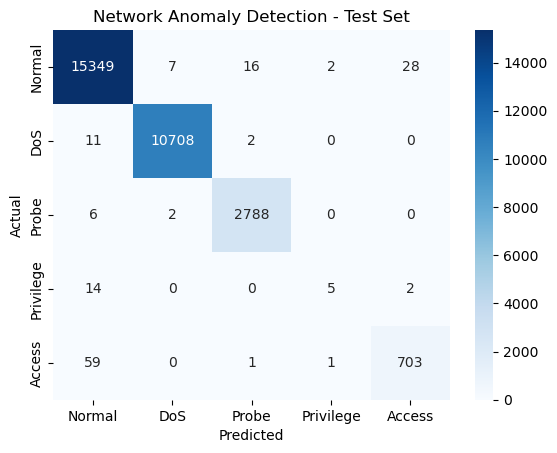

In [30]:
test_conf_matrix = confusion_matrix(test_y, test_multi_predictions)
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Network Anomaly Detection - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [31]:
import joblib
joblib.dump(rf_model_multi, "network_anomaly_detection_model.joblib")
print("Model saved!")


Model saved!
